### Problem Statement: Machine Learning 2
    
Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [14]:
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
PRICEMED: Median value of owner-occupied homes in $1000s

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
bos['PRICEMED'] = boston.target

In [18]:
bos.isnull().any()

CRIM        False
ZN          False
INDUS       False
CHAS        False
NOX         False
RM          False
AGE         False
DIS         False
RAD         False
TAX         False
PTRATIO     False
B           False
LSTAT       False
PRICEMED    False
dtype: bool

In [20]:
bos.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICEMED    0
dtype: int64

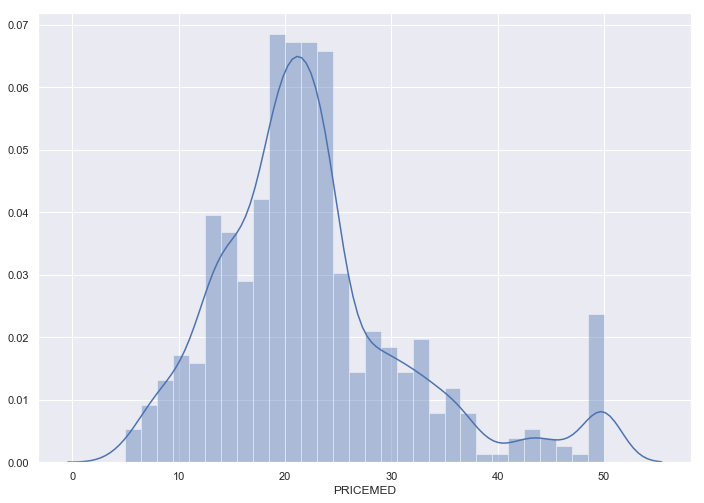

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['PRICEMED'], bins=30)
plt.show()

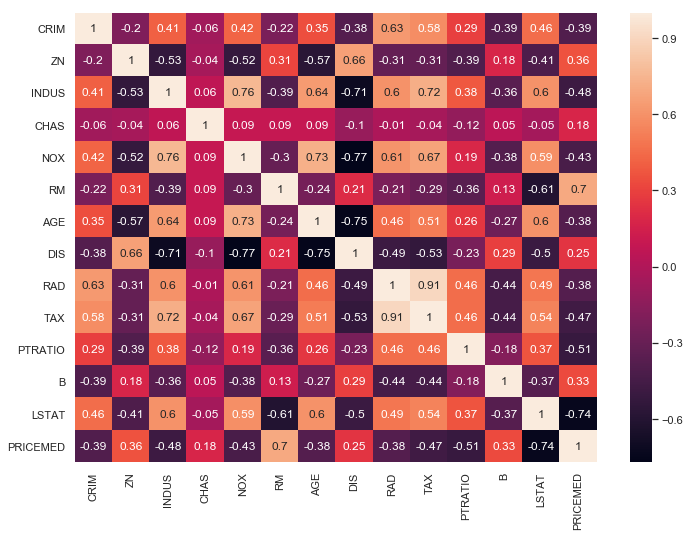

In [23]:

correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

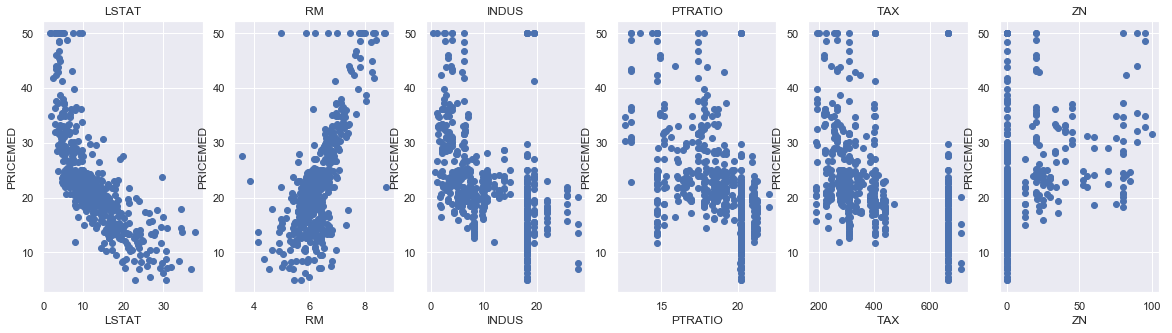

In [89]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','INDUS','PTRATIO','TAX','ZN']
target = bos['PRICEMED']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICEMED')

In [81]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM'],bos['INDUS'],bos['PTRATIO'],bos['TAX'],bos['ZN']], columns = ['LSTAT', 'RM','INDUS','PTRATIO','TAX','ZN'])
Y = bos['PRICEMED']

In [82]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='PRICEMED ~ LSTAT + RM +INDUS+PTRATIO +TAX +ZN', data=bos).fit()
lm1.rsquared

0.6804989744618839

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 6)
(102, 6)
(404,)
(102,)


In [84]:
from sklearn.metrics import r2_score
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm= LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
RMSE is 5.297997899595183
R2 score is 0.6732453194837793




In [86]:
# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.881827311609002
R2 score is 0.6956053099078864


In [90]:


# instantiate, fit
lm = LinearRegression()
lm.fit(X,Y)

#  print features,intercept and coefficients
print(features)
print(lm.intercept_)
print(lm.coef_)

['LSTAT', 'RM', 'INDUS', 'PTRATIO', 'TAX', 'ZN']
17.853804178298496
[-5.60974401e-01  4.62596300e+00  4.81916328e-02 -8.89021791e-01
 -3.36002405e-03 -4.67110670e-03]


In [91]:
#Model evaluation
yhat=lm.predict(X)
rmse=np.sqrt(((y-yhat)**2).mean())
mae=np.abs(y-yhat).mean()
mape=np.mean(np.abs(y - yhat) / y) * 100
rmse,mae,mape

(5.19347039727459, 3.6093406746482, 18.462499808316252)

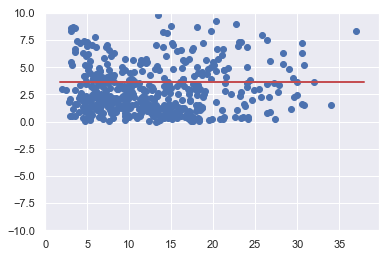

In [94]:
##Homoscedasticity
import matplotlib.pyplot as plt
%matplotlib inline
#plt.scatter(yhat,y)
rmse=np.sqrt((yhat-y)**2)
plt.scatter(X['LSTAT'],rmse)
plt.ylim(-10,10)
plt.plot([X['LSTAT'].min(),X['LSTAT'].max()],[rmse.mean(),rmse.mean()],'r-',linewidth=2)

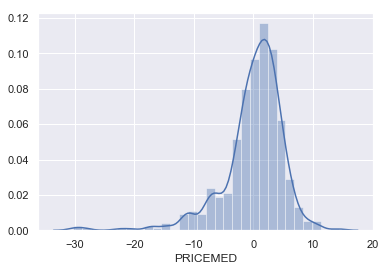

In [95]:
#Errors should be normally distributed
import seaborn as sns
sns.distplot(yhat-y,bins=30)

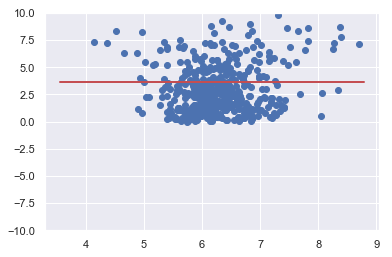

In [93]:
##Homoscedasticity
import matplotlib.pyplot as plt
%matplotlib inline
#plt.scatter(yhat,y)
rmse=np.sqrt((yhat-y)**2)
plt.scatter(X['RM'],rmse)
plt.ylim(-10,10)
plt.plot([X['RM'].min(),X['RM'].max()],[rmse.mean(),rmse.mean()],'r-',linewidth=2)

In [ ]:
#----------------------------------------------------#